/var/folders/4p/n886yd3s3513z05rpt3f5wgm0000gn/T/ipykernel_58890/1899814363.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_patterns = df.groupby(['register type', 'variant type'])['actual usage'].value_counts()
/var/folders/4p/n886yd3s3513z05rpt3f5wgm0000gn/T/ipykernel_58890/1899814363.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
/var/folders/4p/n886yd3s3513z05rpt3f5wgm0000gn/T/ipykernel_58890/1899814363.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silen


=== SOCIOLINGUISTIC DATA ANALYSIS SUMMARY ===

DATASET OVERVIEW:
Total Observations: 100
Unique Registers: 2
Unique Variants: 3
Unique Academic Fields: 13

CATEGORY DISTRIBUTIONS:

REGISTER TYPE:
  Academic: 50.0%
  Casual: 50.0%

VARIANT TYPE:
  Discourse: 34.0%
  Lexical: 34.0%
  Syntactic: 32.0%

ACADEMIC FIELD:
  Bio: 10.0%
  Chemistry: 10.0%
  Anthropology: 8.0%
  CS: 8.0%
  Economics: 8.0%
  English: 8.0%
  Philosophy: 8.0%
  Physics: 8.0%
  Psychology: 8.0%
  Sociology: 8.0%
  social studies: 8.0%
  math: 7.0%
  Math: 1.0%

GENDER:
  F: 50.0%
  M: 50.0%

USAGE STATISTICS BY REGISTER:

mean_usage_length:
  Academic: 38.14
  Casual: 21.38

median_usage_length:
  Academic: 36.00
  Casual: 20.50

std_usage_length:
  Academic: 8.70
  Casual: 5.34

unique_usage_ratio:
  Academic: 0.96
  Casual: 1.00

=== END OF SUMMARY ===


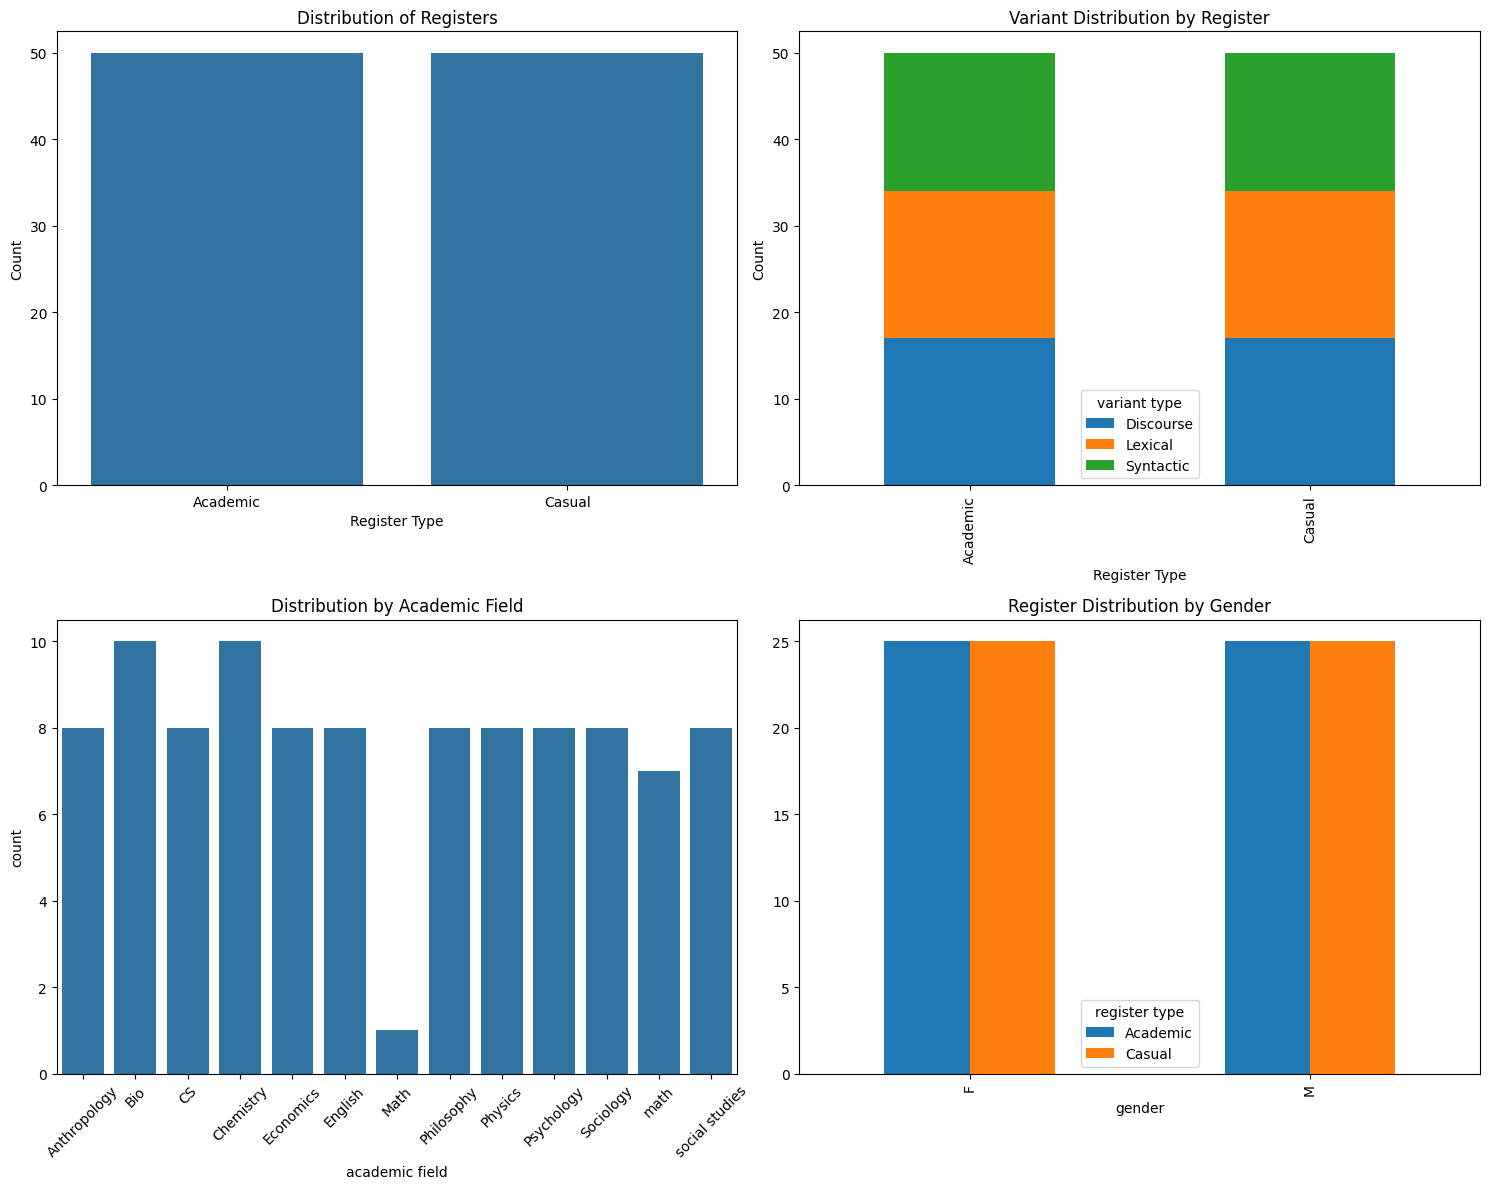

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    """
    Load and perform initial data cleaning
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Clean column names
    df.columns = df.columns.str.strip().str.lower()
    
    # Convert categorical columns to categorical type
    categorical_cols = ['register type', 'variant type', 'academic field', 'gender']
    for col in categorical_cols:
        df[col] = pd.Categorical(df[col])
    
    return df

def analyze_register_distribution(df):
    """
    Analyze the distribution of registers across different contexts
    """
    register_dist = df['register type'].value_counts()
    register_by_field = pd.crosstab(df['academic field'], df['register type'])
    register_by_gender = pd.crosstab(df['gender'], df['register type'])
    
    return {
        'overall_distribution': register_dist,
        'by_field': register_by_field,
        'by_gender': register_by_gender
    }

def analyze_variant_patterns(df):
    """
    Analyze patterns in variant usage
    """
    variant_dist = df['variant type'].value_counts()
    variant_by_register = pd.crosstab(df['register type'], df['variant type'])
    variant_by_field = pd.crosstab(df['academic field'], df['variant type'])
    
    return {
        'overall_distribution': variant_dist,
        'by_register': variant_by_register,
        'by_field': variant_by_field
    }

def chi_square_test(df, var1, var2):
    """
    Perform chi-square test of independence
    """
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    return {
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof,
        'contingency_table': contingency_table
    }

def analyze_usage_patterns(df):
    """
    Analyze actual usage patterns and create frequency distributions
    """
    # Group by register type and variant type to see common patterns
    usage_patterns = df.groupby(['register type', 'variant type'])['actual usage'].value_counts()
    
    # Calculate type-token ratio for each register
    ttr_by_register = {}
    for register in df['register type'].unique():
        register_tokens = df[df['register type'] == register]['actual usage']
        types = len(set(register_tokens))
        tokens = len(register_tokens)
        ttr_by_register[register] = types / tokens if tokens > 0 else 0
        
    return {
        'usage_patterns': usage_patterns,
        'type_token_ratio': ttr_by_register
    }

def plot_distributions(df):
    """
    Create visualizations of the data distributions
    """
    
    # Create multiple plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Register distribution
    sns.countplot(data=df, x='register type', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Registers')
    axes[0,0].set_xlabel('Register Type')
    axes[0,0].set_ylabel('Count')
    
    # Plot 2: Variant distribution by register
    register_variant = pd.crosstab(df['register type'], df['variant type'])
    register_variant.plot(kind='bar', stacked=True, ax=axes[0,1])
    axes[0,1].set_title('Variant Distribution by Register')
    axes[0,1].set_xlabel('Register Type')
    axes[0,1].set_ylabel('Count')
    
    # Plot 3: Academic field distribution
    sns.countplot(data=df, x='academic field', ax=axes[1,0])
    axes[1,0].set_title('Distribution by Academic Field')
    axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
    
    # Plot 4: Gender distribution by register
    gender_register = pd.crosstab(df['gender'], df['register type'])
    gender_register.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Register Distribution by Gender')
    
    plt.tight_layout()
    return fig

def generate_summary_statistics(df):
    """
    Generate comprehensive summary statistics for the dataset
    
    Parameters:
    df (pandas.DataFrame): The input dataframe containing sociolinguistic data
    
    Returns:
    dict: A dictionary containing various summary statistics organized by category
    """
    summary_stats = {}
    
    # Overall dataset statistics
    summary_stats['dataset_overview'] = {
        'total_observations': len(df),
        'unique_registers': df['register type'].nunique(),
        'unique_variants': df['variant type'].nunique(),
        'unique_fields': df['academic field'].nunique(),
        'missing_values': df.isnull().sum().to_dict()
    }
    
    # Register type statistics
    register_stats = df.groupby('register type').agg({
        'variant type': ['count', 'nunique'],
        'actual usage': ['count', 'nunique']
    })
    register_stats.columns = ['total_occurrences', 'unique_variants', 
                            'usage_tokens', 'unique_usage_types']
    summary_stats['register_statistics'] = register_stats.to_dict()
    
    # Calculate proportions for each categorical variable
    categorical_cols = ['register type', 'variant type', 'academic field', 'gender']
    proportions = {}
    for col in categorical_cols:
        prop = (df[col].value_counts() / len(df) * 100).round(2)
        proportions[col] = prop.to_dict()
    summary_stats['category_proportions'] = proportions
    
    # Cross-categorical analysis
    summary_stats['cross_categorical'] = {
        'register_by_field': pd.crosstab(
            df['register type'], 
            df['academic field'], 
            normalize='index'
        ).round(3).to_dict(),
        'variant_by_register': pd.crosstab(
            df['variant type'], 
            df['register type'], 
            normalize='index'
        ).round(3).to_dict()
    }
    
    # Usage pattern statistics
    usage_stats = df.groupby('register type')['actual usage'].agg([
        ('mean_usage_length', lambda x: x.str.len().mean()),
        ('median_usage_length', lambda x: x.str.len().median()),
        ('std_usage_length', lambda x: x.str.len().std()),
        ('unique_usage_ratio', lambda x: len(set(x)) / len(x))
    ]).round(3)
    summary_stats['usage_statistics'] = usage_stats.to_dict()
    
    # Descriptive statistics for numerical features (if any)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        summary_stats['numerical_statistics'] = df[numerical_cols].describe().to_dict()
    
    return summary_stats

def print_summary_report(summary_stats):
    """
    Print a formatted report of the summary statistics
    
    Parameters:
    summary_stats (dict): The dictionary containing summary statistics
    """
    print("\n=== SOCIOLINGUISTIC DATA ANALYSIS SUMMARY ===\n")
    
    # Dataset Overview
    print("DATASET OVERVIEW:")
    overview = summary_stats['dataset_overview']
    print(f"Total Observations: {overview['total_observations']}")
    print(f"Unique Registers: {overview['unique_registers']}")
    print(f"Unique Variants: {overview['unique_variants']}")
    print(f"Unique Academic Fields: {overview['unique_fields']}")
    
    # Category Proportions
    print("\nCATEGORY DISTRIBUTIONS:")
    for category, proportions in summary_stats['category_proportions'].items():
        print(f"\n{category.upper()}:")
        for item, percentage in proportions.items():
            print(f"  {item}: {percentage:.1f}%")
    
    # Usage Statistics
    print("\nUSAGE STATISTICS BY REGISTER:")
    usage_stats = summary_stats['usage_statistics']
    for metric in usage_stats.keys():
        print(f"\n{metric}:")
        for register, value in usage_stats[metric].items():
            print(f"  {register}: {value:.2f}")
    
    print("\n=== END OF SUMMARY ===")

def main():
    # Load and analyze data
    df = load_and_clean_data('sociolinguistic_data.csv')
    
    # Perform analyses
    register_analysis = analyze_register_distribution(df)
    variant_analysis = analyze_variant_patterns(df)
    usage_analysis = analyze_usage_patterns(df)
    
    # Perform statistical tests
    register_variant_test = chi_square_test(df, 'register type', 'variant type')
    register_gender_test = chi_square_test(df, 'register type', 'gender')
    
    # Create visualizations
    plot_distributions(df)

    summary_stats = generate_summary_statistics(df)
    print_summary_report(summary_stats)

    
    return {
        'register_analysis': register_analysis,
        'variant_analysis': variant_analysis,
        'usage_analysis': usage_analysis,
        'statistical_tests': {
            'register_variant': register_variant_test,
            'register_gender': register_gender_test
        },
        'summary_statistics': summary_stats  # Add this line to include summary stats in results

    }

if __name__ == "__main__":
    results = main()